Common Imports for Generalization

In [2]:
import sys

from scipy.stats import bernoulli

assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Importing Meta CSV and display for checks


After filtering rare classes: 1011 samples
diagnosis
basal cell carcinoma             42
blue nevus                       28
clark nevus                     399
combined nevus                   13
congenital nevus                 17
dermal nevus                     33
dermatofibroma                   20
lentigo                          24
melanoma                          1
melanoma (0.76 to 1.5 mm)        53
melanoma (in situ)               64
melanoma (less than 0.76 mm)    102
melanoma (more than 1.5 mm)      28
melanoma metastasis               4
melanosis                        16
miscellaneous                     8
recurrent nevus                   6
reed or spitz nevus              79
seborrheic keratosis             45
vascular lesion                  29
Name: count, dtype: int64


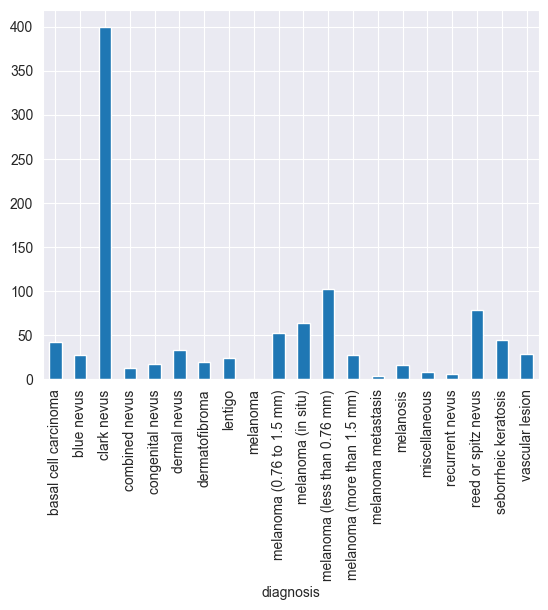

In [3]:
df = pd.read_csv('../Dataset/DERM7PT/meta/meta.csv')
print(f"\nAfter filtering rare classes: {len(df)} samples")
print(df.groupby('diagnosis')['diagnosis'].value_counts())

df.groupby('diagnosis')['diagnosis'].value_counts().plot(kind='bar')
plt.show()

In [5]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
import seaborn as sns

for column in df.columns:
    # Encoding no order categorical values as One Hot Encoder for better correlations
    if column in ['diagnosis', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'vascular_structures', 'elevation', 'location', 'management']:
        # coder = LabelEncoder()
        # columnCoder = coder.fit_transform(df[[column]])
        # df[column] = columnCoder
        df = pd.get_dummies(df, columns=[column])

    # Encoding yes or no type categories into binary mapping
    elif column in ['blue_whitish_veil']:
        df[column] = df[column].map({'present':1,'absent':0})

    elif column in ['sex']:
        df[column] = df[column].map({'male':1,'female':0})

    # Encoding ordered categorical values with Ordinal Encoding
    elif column in ['level_of_diagnostic_difficulty']:
        coder = OrdinalEncoder()
        columnCoder = coder.fit_transform(df[[column]])
        df[column] = columnCoder

new_df = df
new_df = new_df.drop(columns=['clinic','derm','case_id','notes'])
print(new_df.columns)

Index(['case_num', 'seven_point_score', 'blue_whitish_veil',
       'level_of_diagnostic_difficulty', 'sex',
       'diagnosis_basal cell carcinoma', 'diagnosis_blue nevus',
       'diagnosis_clark nevus', 'diagnosis_combined nevus',
       'diagnosis_congenital nevus', 'diagnosis_dermal nevus',
       'diagnosis_dermatofibroma', 'diagnosis_lentigo', 'diagnosis_melanoma',
       'diagnosis_melanoma (0.76 to 1.5 mm)', 'diagnosis_melanoma (in situ)',
       'diagnosis_melanoma (less than 0.76 mm)',
       'diagnosis_melanoma (more than 1.5 mm)',
       'diagnosis_melanoma metastasis', 'diagnosis_melanosis',
       'diagnosis_miscellaneous', 'diagnosis_recurrent nevus',
       'diagnosis_reed or spitz nevus', 'diagnosis_seborrheic keratosis',
       'diagnosis_vascular lesion', 'pigment_network_absent',
       'pigment_network_atypical', 'pigment_network_typical', 'streaks_absent',
       'streaks_irregular', 'streaks_regular', 'pigmentation_absent',
       'pigmentation_diffuse irregular

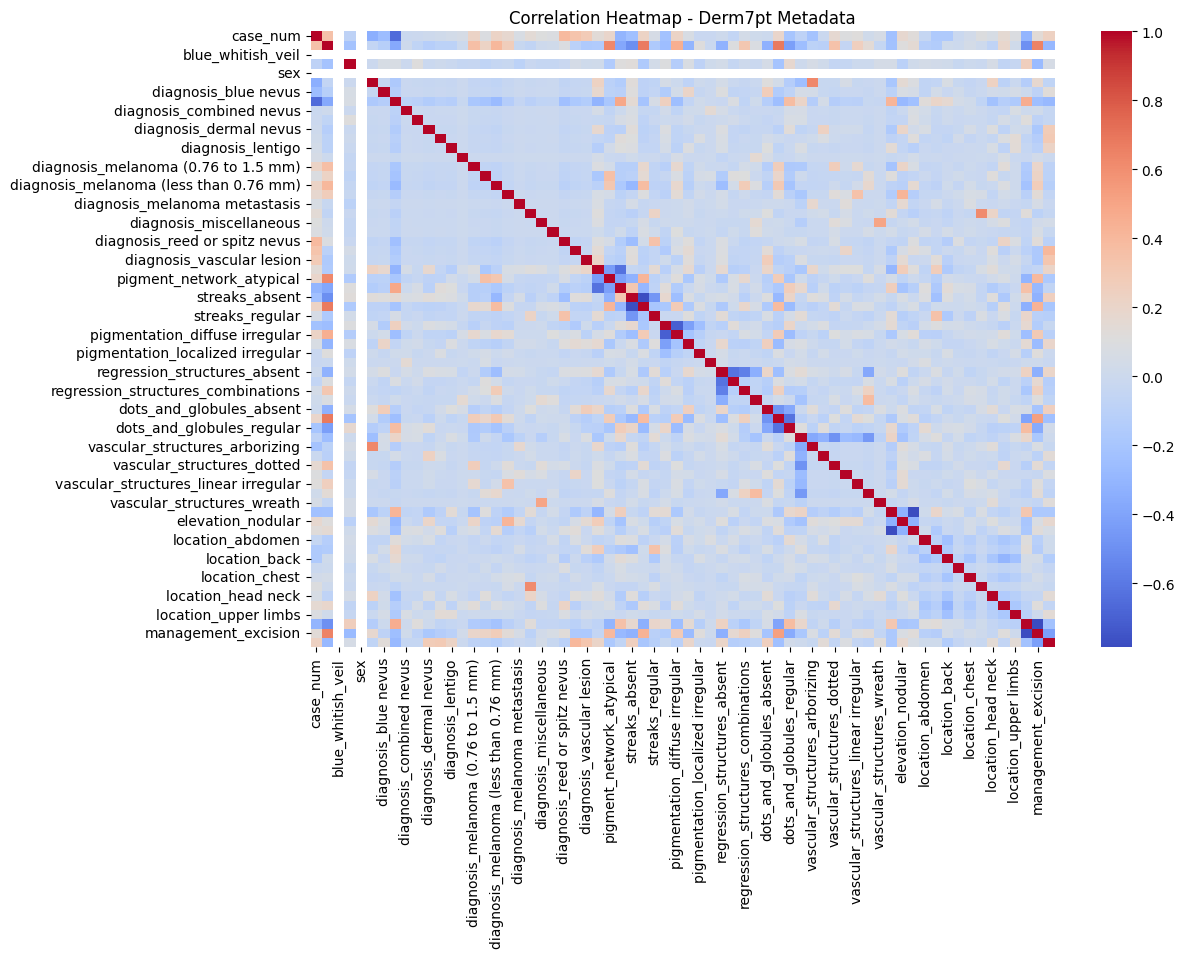

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

corr = new_df.corr()
# print(corr)

with open("output.txt", "w") as f:
    # print(corr, file=f)
    filter = (corr > 0.2) & (corr != 1)
    result = corr[filter].stack().reset_index().rename(columns={'level_0': 'Row', 'level_1': 'Column', 0: 'Value'}).sort_values(by="Value", ascending=False).reset_index(drop=True)
    # result.columns = ['Row', 'Column','Value']
    print(result,file=f)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap - Derm7pt Metadata")
plt.show()


After filtering rare classes: 1006 samples, 18 classes
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
Name: count, dtype: int64

Class Weights:
  basal cell carcinoma: 1.33
  blue nevus: 2.00
  clark nevus: 0.14
  combined nevus: 4.30
  congenital nevus: 3.29
  dermal nevus: 1.69
  dermatofibroma: 2.79
  lentigo: 2.33
  melanoma (0.76 to 1.5 mm): 1.05
  melanoma (in situ): 0.87
  melan

C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Macro: 0.4223 (+/- 0.0862)

Training Final Model...

MODEL EVALUATION
Macro F1 Score: 0.4386
Weighted F1 Score: 0.5536

Detailed Classification Report:
                              precision    recall  f1-score   support

        basal cell carcinoma       0.47      0.54      0.50        13
                  blue nevus       0.42      0.62      0.50         8
                 clark nevus       0.85      0.60      0.70       120
              combined nevus       0.20      0.50      0.29         4
            congenital nevus       0.06      0.20      0.09         5
                dermal nevus       0.44      0.70      0.54        10
              dermatofibroma       0.33      0.33      0.33         6
                     lentigo       0.45      0.71      0.56         7
   melanoma (0.76 to 1.5 mm)       0.57      0.25      0.35        16
          melanoma (in situ)       0.31      0.53      0.39        19
melanoma (less than 0.76 mm)       0.56      0.58      0.

C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-

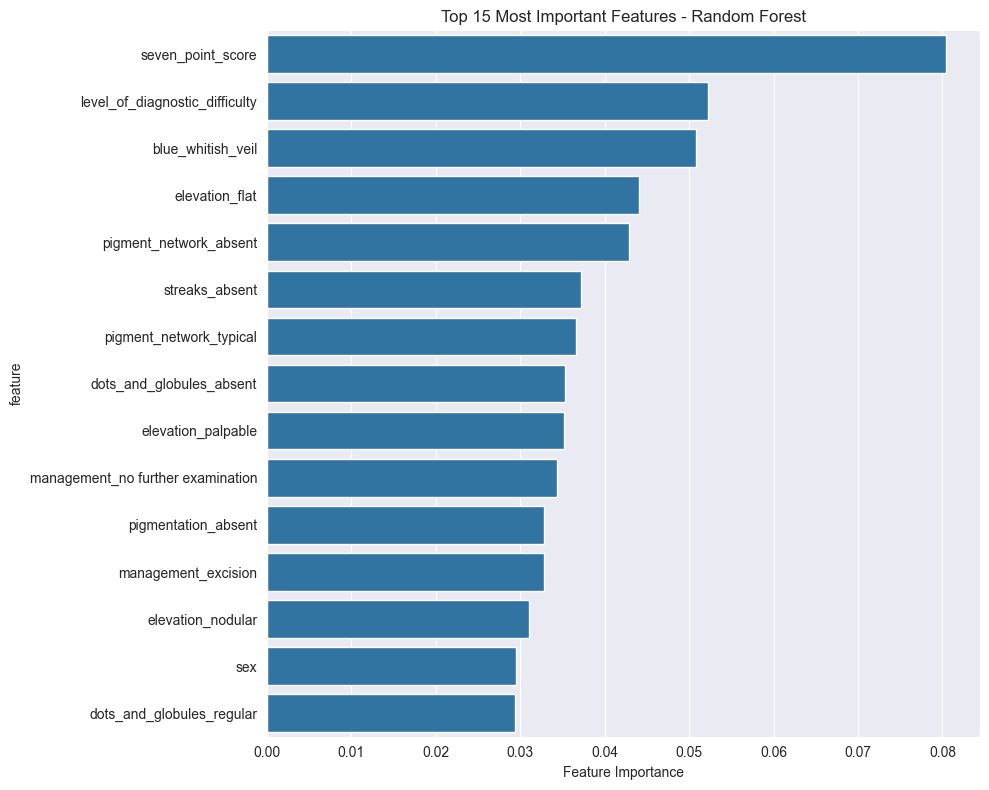

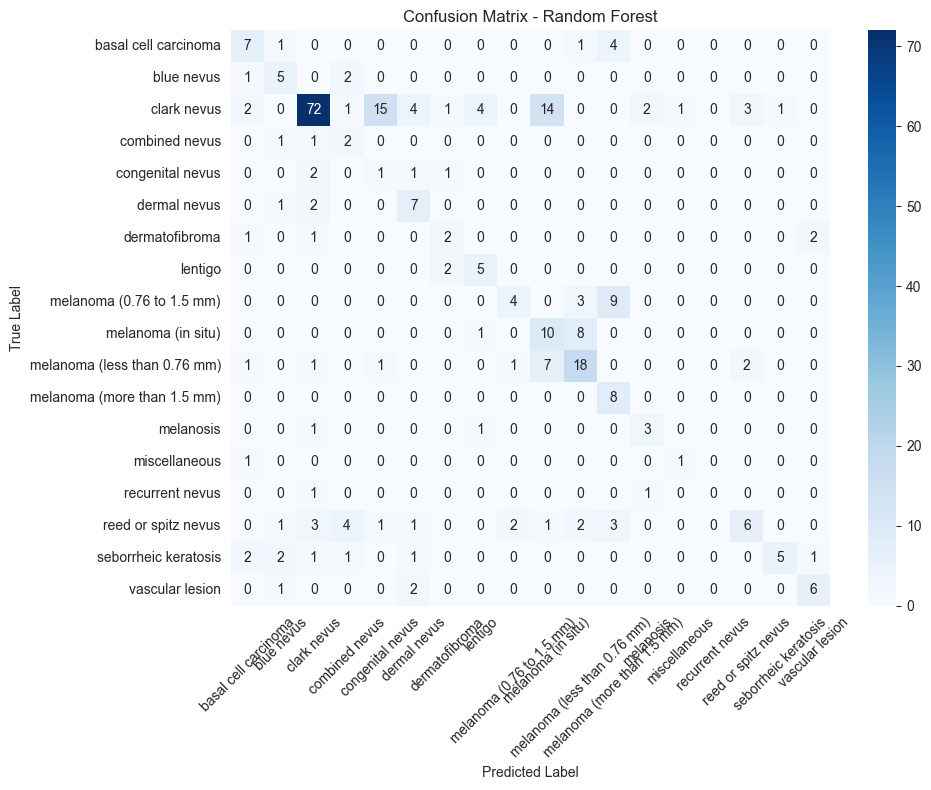


MODEL SUMMARY
Classes: 18
Features: 72
Samples: 1006
Final Test Macro F1: 0.4386
                              precision    recall  f1-score   support

        basal cell carcinoma       0.80      0.50      0.62         8
                  blue nevus       0.33      0.33      0.33         6
                 clark nevus       0.82      0.79      0.80        80
              combined nevus       0.00      0.00      0.00         3
            congenital nevus       0.00      0.00      0.00         3
                dermal nevus       0.43      0.43      0.43         7
              dermatofibroma       1.00      0.50      0.67         4
                     lentigo       0.83      1.00      0.91         5
   melanoma (0.76 to 1.5 mm)       0.47      0.73      0.57        11
          melanoma (in situ)       0.12      0.15      0.14        13
melanoma (less than 0.76 mm)       0.46      0.60      0.52        20
 melanoma (more than 1.5 mm)       0.50      0.33      0.40         6
       

C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-

In [6]:
from sklearn.utils import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


def prepare_for_naive_bayes(df):

    # 2. Remove very rare classes (recommended for better performance)
    diagnosis_counts = df['diagnosis'].value_counts()
    min_samples = 5  # Classes with fewer than 5 samples will be removed
    valid_classes = diagnosis_counts[diagnosis_counts >= min_samples].index
    df_processed = df[df['diagnosis'].isin(valid_classes)]

    print(f"\nAfter filtering rare classes: {len(df_processed)} samples, {len(valid_classes)} classes")
    print(df_processed['diagnosis'].value_counts())

    # Target remains as original strings
    y = df_processed['diagnosis']

    # Feature encoding (your existing logic)
    X_df = df_processed.drop(columns=['clinic','derm','case_num','notes', 'diagnosis'])

    for column in X_df.columns:
        if column in ['blue_whitish_veil']:
            X_df[column] = X_df[column].map({'present':1, 'absent':0})
        elif column in ['sex']:
            X_df[column] = X_df[column].map({'male':1, 'female':0})
        elif column in ['level_of_diagnostic_difficulty']:
            difficulty_map = {'low': 0, 'medium': 1, 'high': 2}
            X_df[column] = X_df[column].map(difficulty_map)
        elif X_df[column].dtype == 'object':
            X_df = pd.get_dummies(X_df, columns=[column], prefix=column)

    return X_df, y, valid_classes


def train_random_forest(X, y):
    """Train and evaluate Random Forest model"""

    # Calculate class weights for imbalance
    classes = np.unique(y)
    class_weights = compute_class_weight(
        'balanced',
        classes=classes,
        y=y
    )
    class_weight_dict = dict(zip(classes, class_weights))

    print("\nClass Weights:")
    for cls, weight in class_weight_dict.items():
        print(f"  {cls}: {weight:.2f}")

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Initialize Random Forest with optimal parameters for medical data
    rf_model = RandomForestClassifier(
        n_estimators=150,           # More trees for stability
        max_depth=10,               # Prevent overfitting
        min_samples_split=5,        # Require minimum samples to split
        min_samples_leaf=3,         # Require minimum samples in leaf
        class_weight=class_weight_dict,  # Handle class imbalance
        random_state=42,
        n_jobs=-1                   # Use all CPU cores
    )

    # Cross-validation
    print("\nPerforming Cross-Validation...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_model, X_train, y_train,
                              cv=cv, scoring='f1_macro', n_jobs=-1)

    print(f"Cross-Validation F1 Macro: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Train final model
    print("\nTraining Final Model...")
    rf_model.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = rf_model.predict(X_test)

    return rf_model, X_test, y_test, y_pred, X_train, y_train

def evaluate_model(rf_model, X_test, y_test, y_pred):
    """Comprehensive model evaluation"""

    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)

    # Key metrics
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    print(f"Macro F1 Score: {f1_macro:.4f}")
    print(f"Weighted F1 Score: {f1_weighted:.4f}")

    # Detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_test.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    return feature_importance, f1_macro

def plot_feature_importance(feature_importance, top_n=15):
    """Plot feature importance"""
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(top_n)

    sns.barplot(data=top_features, y='feature', x='importance')
    plt.title(f'Top {top_n} Most Important Features - Random Forest')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(rf_model, X_test, y_test):
    """Plot confusion matrix"""
    y_pred = rf_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rf_model.classes_,
                yticklabels=rf_model.classes_)
    plt.title('Confusion Matrix - Random Forest')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

fresh_df = pd.read_csv("../Dataset/DERM7PT/meta/meta.csv")
X_df, y, valid_classes = prepare_for_naive_bayes(fresh_df)
# print(y)
rf_model, X_test, y_test, y_pred, X_train, y_train = train_random_forest(X_df, y)
feature_importance, f1_macro = evaluate_model(rf_model, X_test, y_test, y_pred)

plot_feature_importance(feature_importance)
plot_confusion_matrix(rf_model, X_test, y_test)

# Final model summary
print("\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Classes: {len(valid_classes)}")
print(f"Features: {X_df.shape[1]}")
print(f"Samples: {X_df.shape[0]}")
print(f"Final Test Macro F1: {f1_macro:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
y_prediction = bernoulli.predict(X_test)
print(classification_report(y_test, y_prediction))